In [1]:
import time 

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import numpy as np
import pandas as pd

In [6]:
t0 = time.time()
data_dir = '../data/'
file = 'online_retail.csv'
df_origin = pd.read_csv(data_dir + file)
print('Load in ', time.time() - t0)

Load in  1.170936107635498


In [5]:
# export data as CSV
df_origin.to_csv('../data/online_retail.csv', index=False)

In [3]:
# customer 数
df_origin['CustomerID'].nunique()

4372

In [5]:
# customer ごとのトランザクション数の統計値
# NOTE:
# 中央値 = 42 件

df_origin.groupby('CustomerID').size().describe()

count    4372.000000
mean       93.053294
std       232.471608
min         1.000000
25%        17.000000
50%        42.000000
75%       102.000000
max      7983.000000
dtype: float64

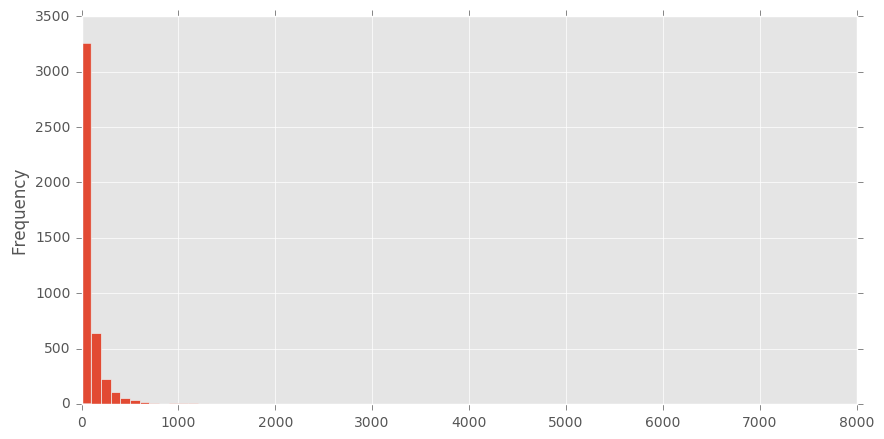

In [11]:
figsize = (10, 5)
bins = np.arange(0, 8000, 100)
df_origin.groupby('CustomerID').size().plot(kind='hist', figsize=figsize, bins=bins)

In [15]:
# トランザクション数の多い customer
df_origin.groupby('CustomerID').size().sort_values(ascending=False)

CustomerID
17841.0    7983
14911.0    5903
14096.0    5128
12748.0    4642
14606.0    2782
15311.0    2491
14646.0    2085
13089.0    1857
13263.0    1677
14298.0    1640
15039.0    1508
14156.0    1420
18118.0    1284
14159.0    1212
14796.0    1165
15005.0    1160
16033.0    1152
14056.0    1128
14769.0    1094
17511.0    1076
13081.0    1061
14527.0    1011
16549.0     981
14456.0     977
15719.0     938
15555.0     925
16931.0     898
17811.0     872
14505.0     803
12415.0     778
           ... 
15590.0       1
16078.0       1
16093.0       1
13703.0       1
18068.0       1
14705.0       1
16138.0       1
16144.0       1
16148.0       1
15562.0       1
15524.0       1
12503.0       1
12505.0       1
15510.0       1
15316.0       1
17956.0       1
17948.0       1
16323.0       1
14090.0       1
17925.0       1
17923.0       1
16428.0       1
14119.0       1
15389.0       1
15369.0       1
13391.0       1
16579.0       1
13366.0       1
17763.0       1
17846.0       1
dtype: int64

## Sales
- 各トランザクションの売上を算出する

In [7]:
df_origin.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [12]:
print('Quantity > 0: ', df_origin[df_origin['Quantity'] > 0].shape)
print('Quantity = 0: ', df_origin[df_origin['Quantity'] == 0].shape)
print('Quantity < 0: ', df_origin[df_origin['Quantity'] < 0].shape)

Quantity > 0:  (531285, 8)
Quantity = 0:  (0, 8)
Quantity < 0:  (10624, 8)


In [25]:
print('UnitPrice < 0 : ', df_origin[df_origin['UnitPrice'] < 0 ].shape)
print('UnitPrice = 0 : ', df_origin[df_origin['UnitPrice'] == 0 ].shape)

UnitPrice < 0 :  (2, 8)
UnitPrice = 0 :  (2515, 8)


In [26]:
df_origin[df_origin['UnitPrice'] < 0 ]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [27]:
df_origin[df_origin['UnitPrice'] == 0 ].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom


In [29]:
df_origin[df_origin['UnitPrice'] == 0 ]['CustomerID'].notnull().sum() 

40

In [34]:
# UnitPrice = 0 & CustomerID not NaN
# NOTE:
# CustomerID = NaN のレコードを除外すればいいだけではないらしい。
# < 0 に加えて UnitPrice = 0 のレコードも 売上を算出するためには除外する。

df_unit_price_zero = df_origin[df_origin['UnitPrice'] == 0 ]
print('UnitPrice = 0 & CustomerID not NaN: ', df_unit_price_zero[df_unit_price_zero['CustomerID'].notnull()].shape)
df_unit_price_zero[df_unit_price_zero['CustomerID'].notnull()].head()

UnitPrice = 0 & CustomerID not NaN:  (40, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2010-12-05 14:02:00,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,2010-12-16 14:36:00,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,2010-12-21 13:45:00,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,2011-01-06 16:41:00,0.0,13081.0,United Kingdom


In [37]:
# CustomerID が NaN でないことを別の書き方で指定しようとしたが、うまく行かなかった。
print('UnitPrice = 0 &  CustomerID != None', df_unit_price_zero[df_unit_price_zero['CustomerID'] != np.nan].shape)
df_unit_price_zero[df_unit_price_zero['CustomerID'] != np.nan].head()

UnitPrice = 0 &  CustomerID != None (2515, 8)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom


In [42]:
# 各トランザクションの売上を算出する
# Quantity < 0 を除外
# UnitPrice <= 0 を除外する
# つまり Quantity >=0 & UnitPrice > 0 のみ抽出

df_unit_price_plus = df_origin[df_origin['UnitPrice'] > 0]
print('df_unit_price_plus.shape = ', df_unit_price_plus.shape)
df_sales = df_unit_price_plus[df_unit_price_plus['Quantity'] >= 0]
print('df_sales.shape = ', df_sales.shape)

df_unit_price_plus.shape =  (539392, 8)
df_sales.shape =  (530104, 8)


In [47]:
# Define DataFrame with Sales column
df_sales['Sales'] = df_sales['Quantity'] * df_sales['UnitPrice']
assert df_sales[(df_sales['Sales'] <= 0)].shape[0] == 0

/Users/fujikinakamura/anaconda3/envs/DataScience/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [44]:
df_sales.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [61]:
df_sales['Sales'].describe(percentiles=[.25, .5, .75, .8, .9, .95]) 

count    530104.000000
mean         20.121871
std         270.356743
min           0.001000
25%           3.750000
50%           9.900000
75%          17.700000
80%          19.800000
90%          32.850000
95%          59.700000
max      168469.600000
Name: Sales, dtype: float64

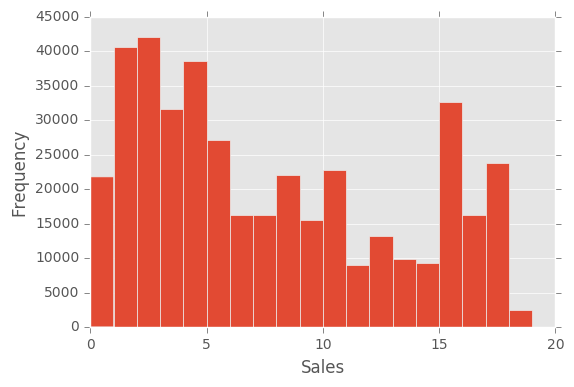

In [57]:
# Sales の histogram
bins = np.arange(0, 20, 1)
df_sales['Sales'].plot(kind='hist', bins=bins)
plt.xlabel('Sales')
plt.show()

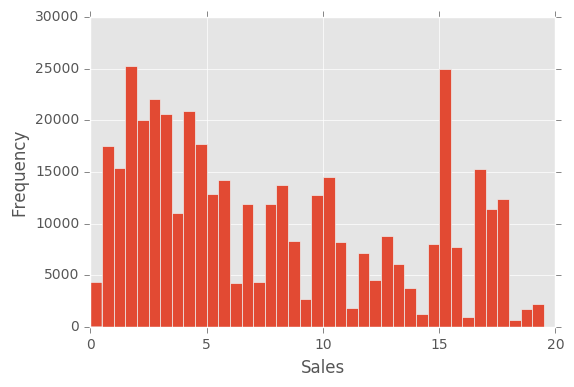

In [59]:
# Sales の histogram
bins = np.arange(0, 20, 0.5)
df_sales['Sales'].plot(kind='hist', bins=bins)
plt.xlabel('Sales')
plt.show()

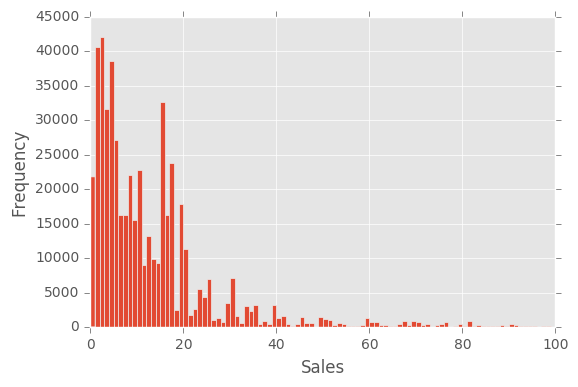

In [62]:
# Sales の histogram
# NOTE:
# 売上の多くは 20ポンド以下である。

bins = np.arange(0, 100, 1)
df_sales['Sales'].plot(kind='hist', bins=bins)
plt.xlabel('Sales')
plt.show()

In [64]:
# どの Country の合計売上が多いか？
# NOTE:
# Netherlands の合計売上が多い。
# トランザクション数はそれほど多いわけではないため、1トランザクションあたりの売上が高いと予想される。

df_sales.groupby('Country')['Sales'].sum().sort_values(ascending=False)

Country
United Kingdom          9.025222e+06
Netherlands             2.854463e+05
EIRE                    2.834540e+05
Germany                 2.288671e+05
France                  2.097151e+05
Australia               1.385213e+05
Spain                   6.157711e+04
Switzerland             5.708990e+04
Belgium                 4.119634e+04
Sweden                  3.837833e+04
Japan                   3.741637e+04
Norway                  3.616544e+04
Portugal                3.374710e+04
Finland                 2.254608e+04
Singapore               2.127929e+04
Channel Islands         2.045044e+04
Denmark                 1.895534e+04
Italy                   1.748324e+04
Hong Kong               1.569180e+04
Cyprus                  1.359038e+04
Austria                 1.019868e+04
Israel                  8.135260e+03
Poland                  7.334650e+03
Greece                  4.760520e+03
Unspecified             4.749790e+03
Iceland                 4.310000e+03
Canada                  3.6663

In [66]:
# 1トランザクションあたりの平均売上が高い Country は？
# NOTE:
# やはり Netherlands の平均売上は高い。
# Australia, Japan, Singapore も高い。Asia Pacific 地域に人気の商品などがある？

df_sales.groupby('Country')['Sales'].mean().sort_values(ascending=False)

Country
Netherlands             121.003111
Australia               117.192310
Japan                   116.561900
Singapore                95.852658
Sweden                   85.096075
Hong Kong                55.252817
Denmark                  49.882474
Lithuania                47.458857
Bahrain                  41.896667
Lebanon                  37.641778
EIRE                     35.925724
Brazil                   35.737500
Norway                   33.767918
Czech Republic           33.069600
Finland                  32.913985
Greece                   32.831172
Switzerland              29.038606
United Arab Emirates     27.974706
Israel                   27.577153
Channel Islands          27.340160
Austria                  25.624824
Germany                  25.317162
France                   24.945297
Spain                    24.789497
Malta                    24.335625
Canada                   24.280662
Iceland                  23.681319
Italy                    23.064960
Portugal    

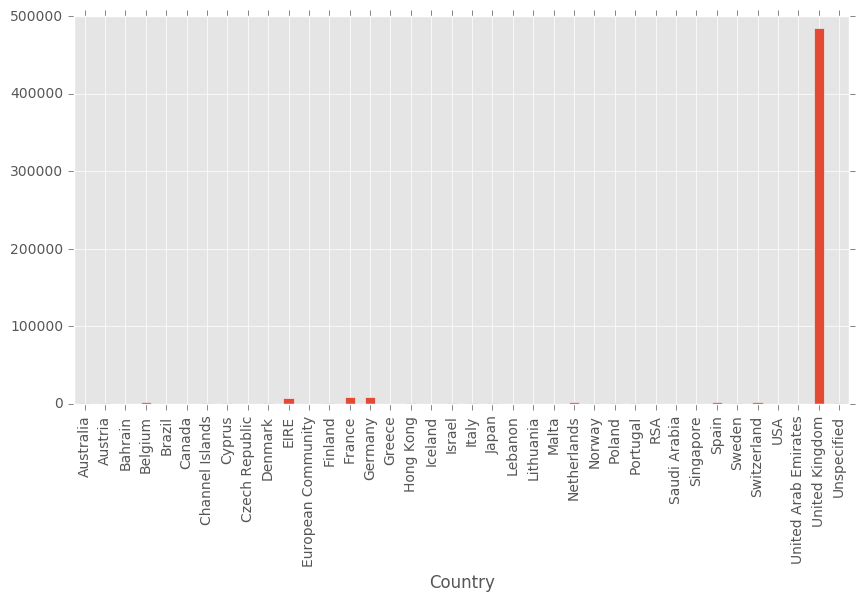

In [67]:
# Quantity < 0 などのレコードを除外したデータを見たときに、トランザクション数の多い Country は？
# NOTE:
# 除外をしない場合とほとんど変わらないように見える。

figsize = (10, 5)
df_sales.groupby('Country').size().plot(kind='bar', figsize=figsize)
plt.show()

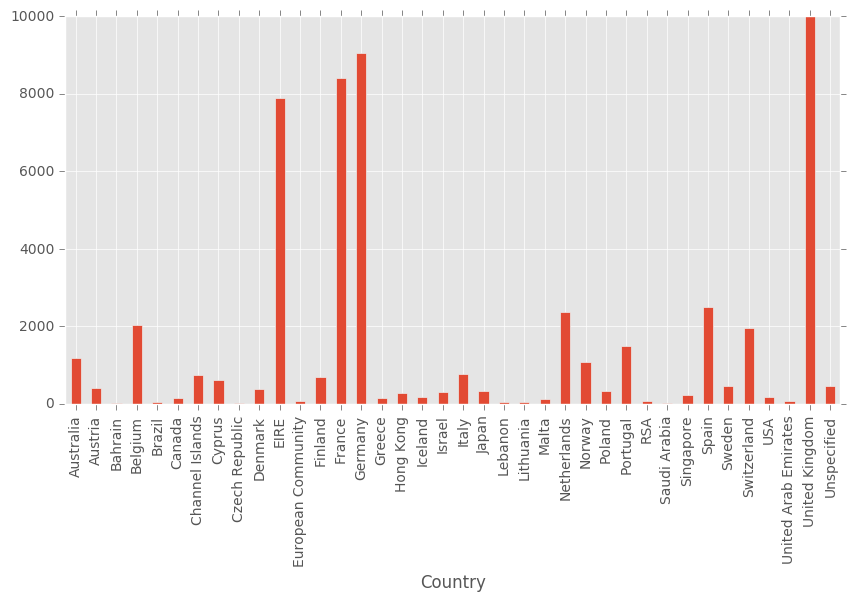

In [68]:
# 上のデータについて、UK 以外の Country ではどの Country のトランザクションが多いのか？
# NOTE:
# ローデータを見たときと Country の傾向はほとんど変わらないように見える。

figsize = (10, 5)
ymax = 10000
df_sales.groupby('Country').size().plot(kind='bar', figsize=figsize)
plt.ylim(0, ymax)
plt.show()

In [73]:
# NOTE: 少しはキャンセル等 除外対象レコードがあるらしい。
print('除外前, Netherlands: ', df_origin[df_origin['Country'] == 'Netherlands'].shape)
print('除外後, Netherlands: ', df_sales[df_sales['Country'] == 'Netherlands'].shape)

除外前, Netherlands:  (2371, 8)
除外後, Netherlands:  (2359, 9)


/Users/fujikinakamura/anaconda3/envs/DataScience/lib/python3.5/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


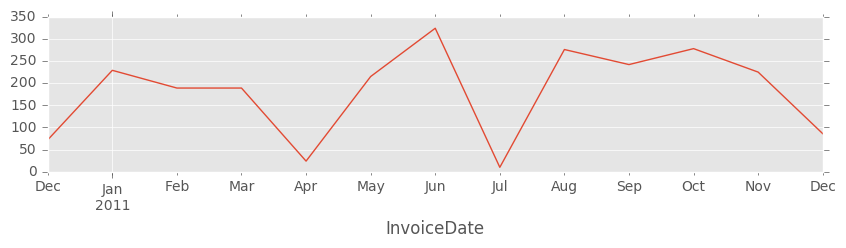

In [92]:
# Netherlands のトランザクション数を時系列で見る
# NOTE:

figsize = (10, 2)
df_sales['InvoiceDate'] = pd.to_datetime(df_sales['InvoiceDate'])
df_sales[df_sales['Country'] == 'Netherlands']\
.groupby(pd.Grouper(key='InvoiceDate', freq='MS')).size()\
.plot(figsize=figsize)

/Users/fujikinakamura/anaconda3/envs/DataScience/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


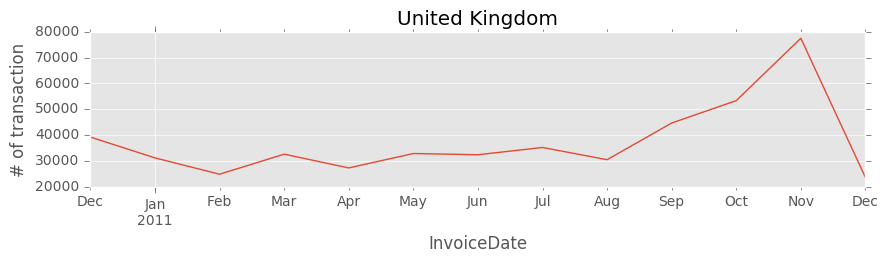

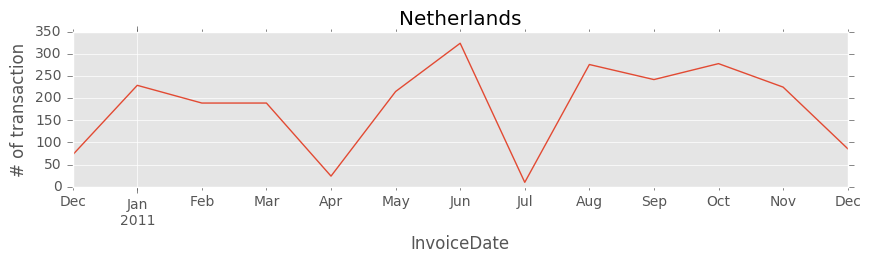

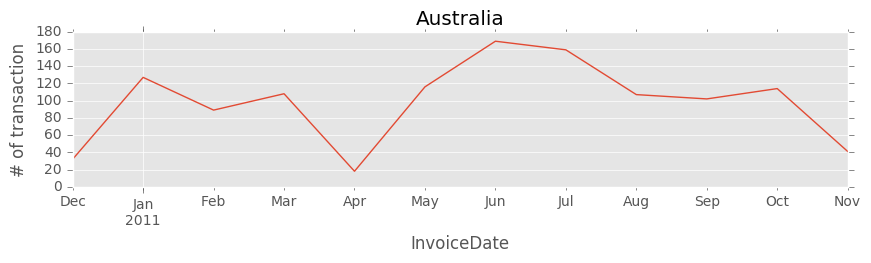

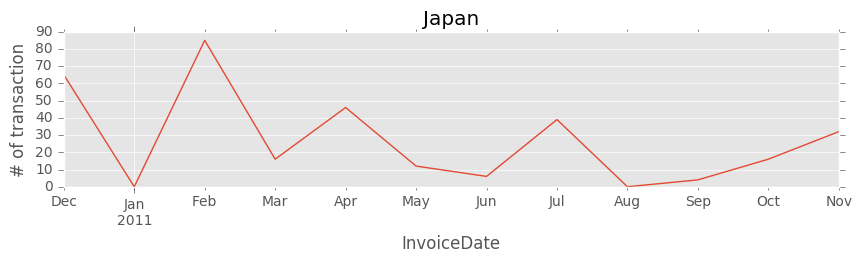

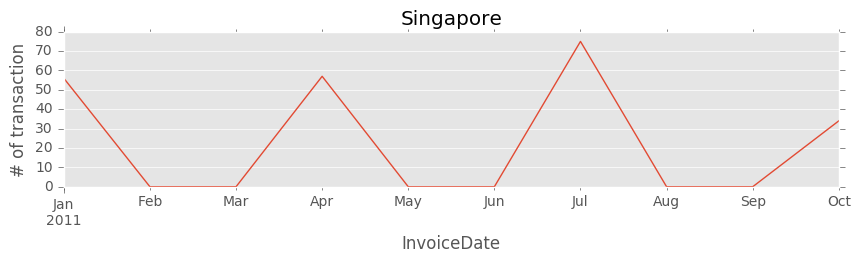

In [96]:
# トランザクション数を時系列で見て、各 Country で比較
# NOTE:
# Netherlands と Australia のトランザクション数の推移の傾向は似ていなくもない (ただし 7月は大きく違う)。
# 商品が類似しているのではないか？

countries = ['United Kingdom', 'Netherlands', 'Australia', 'Japan', 'Singapore']
for country in countries:
    figsize = (10, 2)
    df_sales['InvoiceDate'] = pd.to_datetime(df_sales['InvoiceDate'])
    df_sales[df_sales['Country'] == country]\
    .groupby(pd.Grouper(key='InvoiceDate', freq='MS')).size()\
    .plot(figsize=figsize)
    plt.title(country)
    plt.ylabel('# of transaction')
    plt.show()

In [99]:
# TODO: 各 Country で Customer の偏りはあるのか？
df_sales[df_sales['Country'] == 'United Kingdom'].groupby('CustomerID').size().describe()

count    3920.000000
mean       90.388010
std       217.808385
min         1.000000
25%        17.000000
50%        41.000000
75%        99.250000
max      7847.000000
dtype: float64

In [100]:
# Netherlands, 顧客別のトランザクション数
# NOTE:
# この情報からは (まだ) あまり有意義なことを見出せない。

df_sales[df_sales['Country'] == 'Netherlands'].groupby('CustomerID').size().describe()

count       9.000000
mean      262.111111
std       680.883882
min         2.000000
25%        20.000000
50%        25.000000
75%        66.000000
max      2076.000000
dtype: float64

In [109]:
# Netherlands, 顧客間でトランザクション数の偏りがあるかどうか見てみる。
# NOTE:
# 顧客 14646 に大きく依存しているように見える。

df_sales[df_sales['Country'] == 'Netherlands'].groupby('CustomerID').size().sort_values()

CustomerID
12791.0       2
12789.0       4
12787.0      20
12790.0      21
12802.0      25
12778.0      50
12775.0      66
12759.0      95
14646.0    2076
dtype: int64

In [125]:
# Netherlands, 顧客ごとの合計売上をみる

df_sales_netherlands = df_sales[df_sales['Country'] == 'Netherlands']
df_sales_netherlands.groupby(['CustomerID'])['Sales'].sum()

CustomerID
12759.0      1531.44
12775.0      1386.04
12778.0       822.23
12787.0       463.66
12789.0        91.85
12790.0       324.92
12791.0       192.60
12802.0       427.58
14646.0    280206.02
Name: Sales, dtype: float64

In [110]:
# Netherlands, 顧客間で 1トランザクションあたりの売上は違いがあるのか？
# ないのであれば、ある顧客にトランザクションが集中している状況を変え、
# 他の顧客のトランザクションを増やすことによって 効果的に売上を伸ばすことができる。
# (なぜ "効果的" か？ ∵ Netherlands の 1トランザクションあたりの平均売上は高いため)
# NOTE:
# 顧客 14646 の  1トランザクションあたりの平均売上は高い。
# Netherlands では 顧客 14646 が重要な顧客であるよう。
# 12791 も重要そう。

df_sales_netherlands = df_sales[df_sales['Country'] == 'Netherlands']
df_sales_netherlands.groupby(['CustomerID'])['Sales'].mean()

CustomerID
12759.0     16.120421
12775.0     21.000606
12778.0     16.444600
12787.0     23.183000
12789.0     22.962500
12790.0     15.472381
12791.0     96.300000
12802.0     17.103200
14646.0    134.973998
Name: Sales, dtype: float64

In [111]:
# 上と同様の視点で median をみる
df_sales_netherlands.groupby(['CustomerID'])['Sales'].median()

CustomerID
12759.0     15.00
12775.0     18.75
12778.0     15.00
12787.0     18.90
12789.0     18.45
12790.0     13.00
12791.0     96.30
12802.0     16.50
14646.0    105.60
Name: Sales, dtype: float64

In [124]:
# 顧客ごとに売上を要約しないでみる
# TODO: 重要顧客とそうではない顧客を分ける特徴を見極めたい

# print('Netherlands\' transaction : ', df_sales_netherlands.shape)
netherlands_customers = df_sales_netherlands['CustomerID'].sort_values().unique()
customer_id = netherlands_customers[0]
print(df_sales_netherlands[df_sales_netherlands['CustomerID'] == customer_id].shape)
df_sales_netherlands[df_sales_netherlands['CustomerID'] == customer_id].sort_values(['InvoiceNo'])

(95, 9)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales
114542,546027,22367,CHILDRENS APRON SPACEBOY DESIGN,8,2011-03-09 08:09:00,1.95,12759.0,Netherlands,15.60
114568,546027,POST,POSTAGE,2,2011-03-09 08:09:00,15.00,12759.0,Netherlands,30.00
114567,546027,20704,MR ROBOT SOFT TOY,2,2011-03-09 08:09:00,6.95,12759.0,Netherlands,13.90
114566,546027,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-03-09 08:09:00,4.95,12759.0,Netherlands,14.85
114565,546027,22617,BAKING SET SPACEBOY DESIGN,3,2011-03-09 08:09:00,4.95,12759.0,Netherlands,14.85
114563,546027,22637,PIGGY BANK RETROSPOT,4,2011-03-09 08:09:00,2.55,12759.0,Netherlands,10.20
114562,546027,22492,MINI PAINT SET VINTAGE,36,2011-03-09 08:09:00,0.65,12759.0,Netherlands,23.40
114561,546027,22630,DOLLY GIRL LUNCH BOX,12,2011-03-09 08:09:00,1.95,12759.0,Netherlands,23.40
114560,546027,22661,CHARLOTTE BAG DOLLY GIRL DESIGN,10,2011-03-09 08:09:00,0.85,12759.0,Netherlands,8.50
114559,546027,84997D,CHILDRENS CUTLERY POLKADOT PINK,4,2011-03-09 08:09:00,4.15,12759.0,Netherlands,16.60


In [107]:
# Country 別に 1 Customer あたりのトランザクション数を比較する
# 国別にみると その国の Customer 間でトランザクション数の偏りがあるのではないか？

pd.DataFrame(df_sales.groupby(['Country', 'CustomerID']).size())
#.groupby('Country').mean() 
#.sort_values(ascending=False)

0
Country        CustomerID     
Australia      12386.0      10
               12388.0     100
               12393.0      64
               12415.0     714
               12422.0      21
               12424.0      30
               12431.0     181
               12434.0      50
               16321.0      12
Austria        12358.0      19
               12360.0     129
               12370.0       8
               12373.0      14
               12374.0      33
               12414.0      18
               12429.0      21
               12453.0      43
               12817.0       4
               12818.0      14
               12865.0      95
Bahrain        12353.0       4
               12355.0      13
Belgium        12361.0      10
               12362.0     266
               12364.0      85
               12379.0      40
               12380.0     104
               12383.0      99
               12390.0      32
               12394.0      21
...                        ...
United Kingdom 18249.0       8
               18250.0      21
               18251.0      16
               18252.0      98
               18255.0       6
               18257.0     118
               18259.0      42
               18260.0     134
               18261.0      21
               18262.0      13
               18263.0      61
               18265.0      46
               18268.0       1
               18269.0       7
               18270.0      11
               18272.0     166
               18273.0       3
               18274.0      11
               18276.0      14
               18277.0       8
               18278.0       9
               18280.0      10
               18281.0       7
               18282.0      12
               18283.0     756
               18287.0      70
Unspecified    12363.0      23
               12743.0     134
               14265.0      31
               16320.0      56

[4346 rows x 1 columns]

In [127]:
# export as CSV
df_sales.to_csv(data_dir + 'df_sales.csv', index=False)

In [ ]:
# Netherlands のトランザクション数を増加させることの売上増加への寄与度は大きい。
# どうやって Netherlands のトランザクション数を増加させるか？

In [ ]:
# 1トランザクションあたりの売上が高い　Customer
